# Clase 5 Tiro Parabólico

In [1]:
from pylab import *
%matplotlib inline

# Runge Kutta

In [7]:
def rk4(ec,p_ini,x,h=0.00001):
    if (x[1]-x[0]) <= 5.0*h: #para asegurarnos de que el dominio aunque sea pequeño sea decente
        h = (x[1]-x[0])/10
        
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini #[0,:] tomando los datos del primer renglon O va hacia abajo y : todo hacia la derecha
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        
        sol[i+1,:] = sol[i,:] + (h/6.0)*(k1+2*k2+2*k3+k4)
    
    return tiempos, sol

In [8]:
def ec_mov(r_v,t,g=9.8,m=1):
    
    dx = r_v[2]
    dy = r_v[3]
    
    dvx = 0
    dvy = -(g/m)
    
    return array([dx,dy,dvx,dvy])

In [10]:
def ec_mov_fri(r_v,t,gamma=1,g=9.8,m=1):
    dx = r_v[2]
    dy = r_v[3]
    
    dvx = -gamma*r_v[2]
    dvy = -gamma*r_v[3] -(g/m)
    
    return array ([dx,dy,dvx,dvy])

(0, 2)

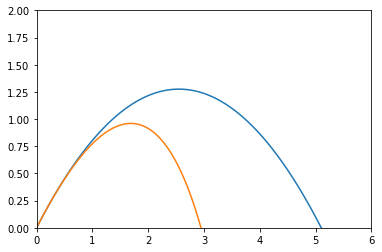

In [13]:
p_ini = [0,0,5,5]
t,sol = rk4(ec_mov,p_ini,[0,2])
plot (sol[:,0],sol[:,1])

tf,solf = rk4(ec_mov_fri,p_ini,[0,2])
plot (solf[:,0],solf[:,1])
xlim(0,6)
ylim(0,2)